<a href="https://colab.research.google.com/github/AdityaMVerma/Zeotap/blob/main/ADITYA_VERMA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Data Overview
print("\nData Overview:")
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Display merged dataset
print("\nMerged Dataset:")
print(merged_data.head())



Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

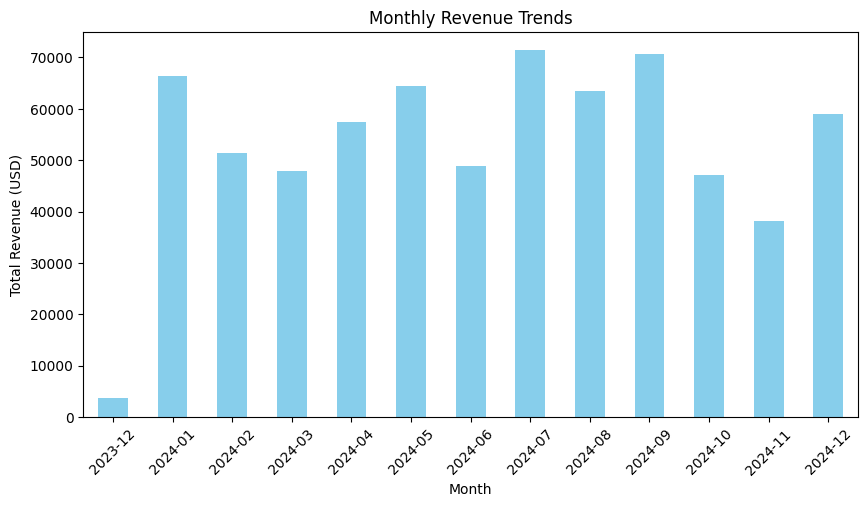

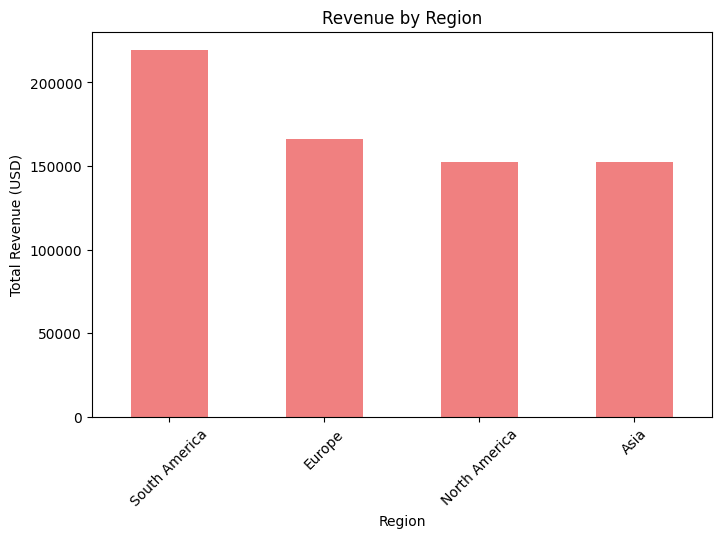

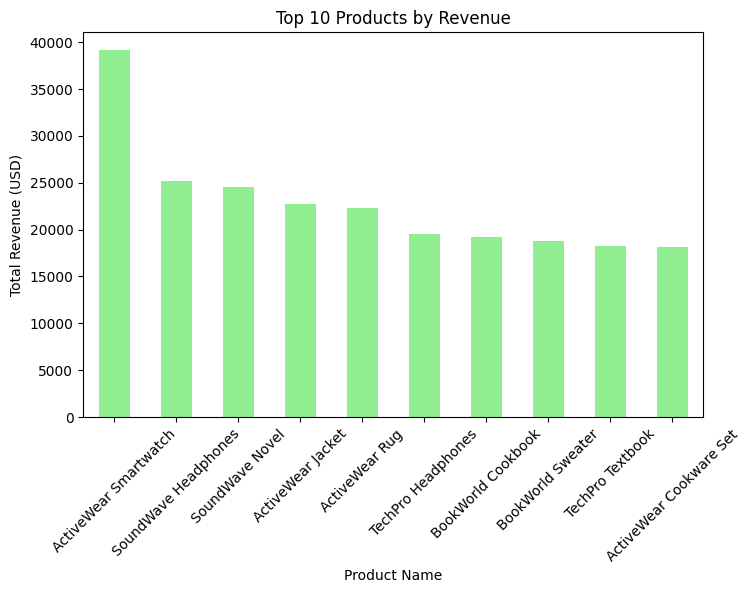

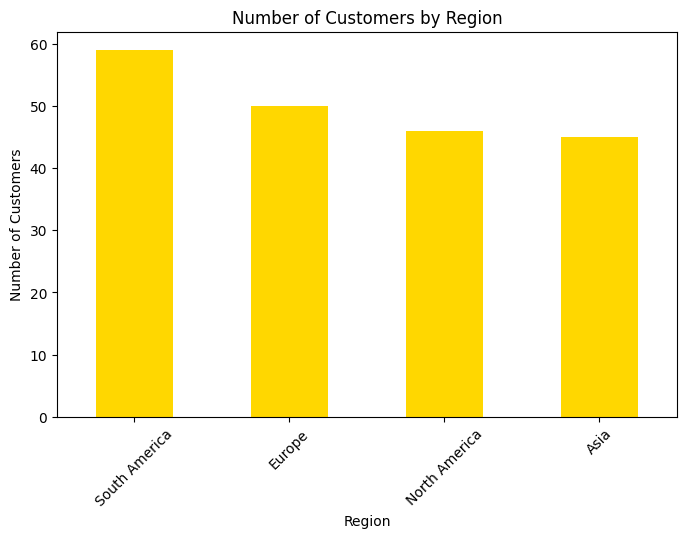


Average Transaction Value: $690.00


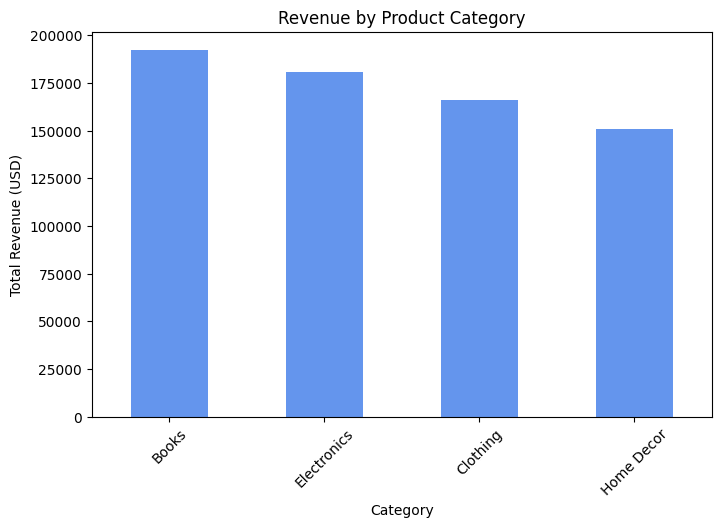

In [ ]:
# Exploratory Data Analysis
# 1. Transactions over time
plt.figure(figsize=(10, 5))
merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# 2. Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='lightcoral')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# 3. Top-performing products
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# 4. Customer segmentation by region
customer_count_region = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
customer_count_region.plot(kind='bar', color='gold')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 5. Average transaction value
avg_transaction_value = merged_data['TotalValue'].mean()
print(f"\nAverage Transaction Value: ${avg_transaction_value:.2f}")

# 6. Revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='cornflowerblue')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Save cleaned and merged data for further use
merged_data.to_csv('Merged_eCommerce_Data.csv', index=False)


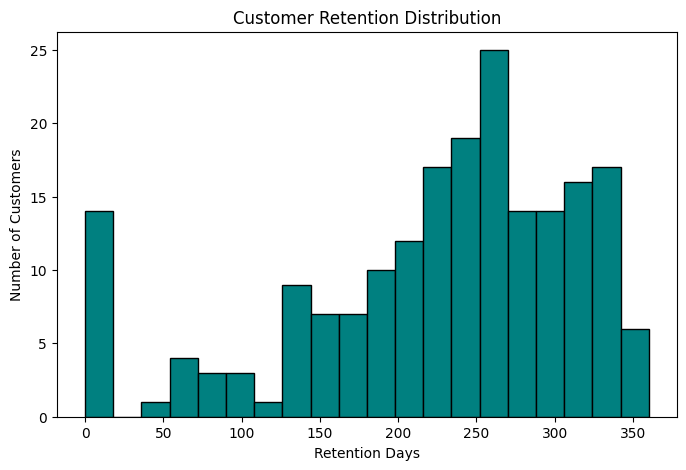


Top 5 Customers by Revenue:
  CustomerID   CustomerName         Region  TotalValue
0      C0141   Paul Parsons         Europe    10673.87
1      C0054   Bruce Rhodes           Asia     8040.39
2      C0065   Gerald Hines  North America     7663.70
3      C0156  William Adams  North America     7634.45
4      C0082   Aimee Taylor  South America     7572.91


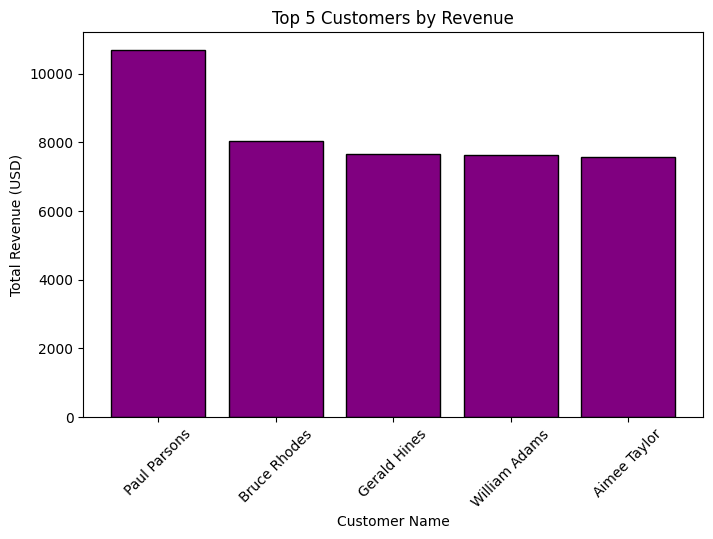

In [ ]:
# Customer Retention Analysis
# Calculate the time between first and last transactions for each customer
customer_transactions = merged_data.groupby('CustomerID')['TransactionDate'].agg(['min', 'max']).reset_index()
customer_transactions['RetentionDays'] = (customer_transactions['max'] - customer_transactions['min']).dt.days

# Plot retention histogram
plt.figure(figsize=(8, 5))
plt.hist(customer_transactions['RetentionDays'], bins=20, color='teal', edgecolor='black')
plt.title('Customer Retention Distribution')
plt.xlabel('Retention Days')
plt.ylabel('Number of Customers')
plt.show()

# Most Valued Customers (Top 5 by Revenue)
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Merge to get customer details
top_customers = customer_revenue.reset_index().merge(customers, on='CustomerID', how='left')
print("\nTop 5 Customers by Revenue:")
print(top_customers[['CustomerID', 'CustomerName', 'Region', 'TotalValue']])

# Plot top 5 customers
plt.figure(figsize=(8, 5))
plt.bar(top_customers['CustomerName'], top_customers['TotalValue'], color='purple', edgecolor='black')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Save cleaned and merged data for further use
merged_data.to_csv('Merged_eCommerce_Data.csv', index=False)